# 1. 사이킷런 라이브러리를 임포트 하시오

### 데이터 설명
학습용 데이터 셋을 활용하여 모델을 학습하고, 테스트용 데이터셋에 대한 생존 여부를 예측합니다. 
- 학습용 데이터 셋 (train.csv) : 891명의 승객 정보와 생존 여부를 포함한 데이터
- 테스트용 데이터 셋 (test.csv) : 418명의 승객 정보를 포함한 데이터, 생존 여부는 누락되어 있습니다. 


| 컬럼명       | 내용                                                       |
| :--------- | :--------------------------------------------------------- |
| PassengerId  | 승객의 고유 식별자                                        |
| Survived     | 생존 여부 (0: 사망, 1: 생존)                               |
| Pclass       | 티켓 등급 (1: 1등석, 2: 2등석, 3: 3등석)                     |
| Name         | 승객의 이름                                                |
| Sex          | 승객의 성별 (male: 남성, female: 여성)                      |
| Age          | 승객의 나이                                                |
| SibSp        | 함께 탑승한 형제자매/배우자 수                              |
| Parch        | 함께 탑승한 부모/자녀 수                                   |
| Ticket       | 티켓 번호                                                  |
| Fare         | 지불한 운임 요금                                           |
| Cabin        | 객실 번호                                                  |
| Embarked     | 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)     |

In [1]:
import sklearn as sk

# 2. 판다스 라이브러리를 임포트 하시오.

In [3]:
import pandas as pd

# 3. 로드한 데이터 프레임을 두개로 쪼개시오, 쪼개진 df의 id 컬럼은 동일하게 있어야함

In [4]:
df = pd.read_csv('./dataset/titanic_train.csv')
df.head()

df_one =  df[['PassengerId', 'Sex', 'Age']]

df_two = df[df.columns[~df.columns.isin(['Sex', 'Age'])]]

df_one.head(), df_two.head()

(   PassengerId     Sex   Age
 0            1    male  22.0
 1            2  female  38.0
 2            3  female  26.0
 3            4  female  35.0
 4            5    male  35.0,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0   
 2                             Heikkinen, Miss. Laina      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0   
 4                           Allen, Mr. William Henry      0      0   
 
              Ticket     Fare Cabin Embarked  
 0         A/5 21171   7.2500   NaN        S  
 1          PC 17599  71.2833   C85        C  
 2  STON/O2. 3101282   7.9

# 4. 쪼개진 df를 합치시오. dataframe의 Merge 사용

In [5]:
result = pd.merge(df_one, df_two, on='PassengerId', how='inner')

result.head()

,PassengerId,Sex,Age,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,male,22.0,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S
1,2,female,38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,female,35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S
4,5,male,35.0,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S


# 5. Pclass 의 분포도를 seaborn countplot 으로 그리시오

<Axes: xlabel='Pclass', ylabel='count'>

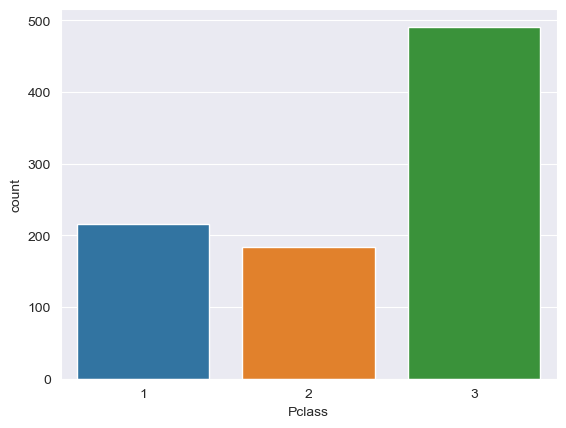

In [6]:
import seaborn as sns

sns.countplot(df, x='Pclass')

# 6. age, pclass의 Joint plot 를 그리시오.

/Users/hajubal/anaconda3/envs/pythonEdu/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hajubal/anaconda3/envs/pythonEdu/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


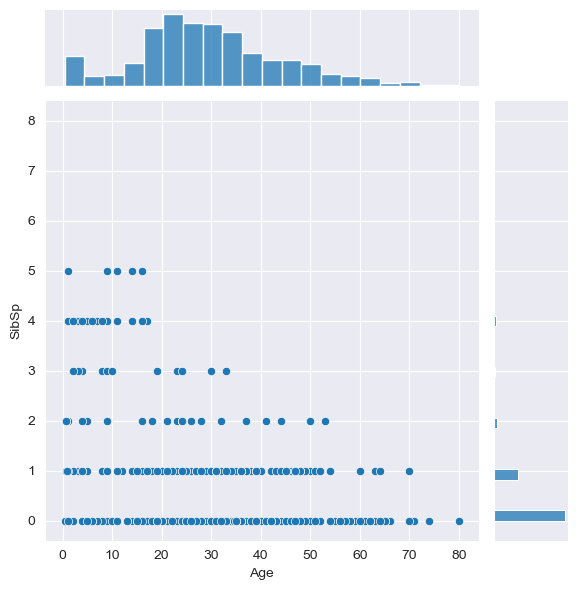

In [7]:
sns.jointplot(df, x='Age', y='SibSp')

# 7. 나이 이상치를 확인, 불필요 컬럼 삭제
- 나이가 60세 이상인 데이터 삭제
- PassengerId, Ticket, Fare, Cabin, Embarked 컬럼 삭제

In [8]:
temp_df = df[df['Age'] < 60]

temp_df = temp_df.drop(axis=1, columns=['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name'])

temp_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


# 8. 결측치 삭제
- 전체 결측치의 갯수 출력
- Age의 결측치를 삭제
- 전체 결측치를 삭제

In [9]:
print(df.isnull().sum().sum())

sample_df = temp_df.dropna(subset=['Age'])

sample_df = temp_df.dropna() 

print(sample_df.isnull().sum().sum())

866
0


# 9. object 타입 원핫 인코딩

In [15]:
sample_df.info()

sample_df = pd.get_dummies(sample_df, columns=['Sex'], drop_first=True)

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  688 non-null    int64  
 1   Pclass    688 non-null    int64  
 2   Age       688 non-null    float64
 3   SibSp     688 non-null    int64  
 4   Parch     688 non-null    int64  
 5   Sex_male  688 non-null    bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 32.9 KB


KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

# 10. 테스트, 검증셋 분리

In [16]:
from sklearn.model_selection import train_test_split

X = sample_df.drop(columns=['Survived'], axis=1)
y = sample_df['Survived']

print(X.shape)
print(y.shape)

X_train, x_valid, Y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


(688, 5)
(688,)


# 11. RobustScalar 수행

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import mean_squared_error

clf = LogisticRegression().fit(X_train, Y_train)
x_predict = clf.predict(x_valid)

print(np.sqrt(mean_squared_error(y_valid, x_predict)))

0.45577348387004024


In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_valid)

clf = LogisticRegression().fit(X_train_scaled, Y_train)
y_predict_scaled = clf.predict(x_test_scaled)

print(np.sqrt(mean_squared_error(y_valid, y_predict_scaled)))

0.45577348387004024


# 12. 의사결정나무, 랜덤포레스트 모델 학습

In [20]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt

dtc = DecisionTreeClassifier(min_samples_split=3, random_state=120, max_depth=5)
# dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc_baseline = dtc.predict(x_valid)



from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(min_samples_split=3, random_state=120, max_depth=5)
rfc.fit(X_train, Y_train)
dfc_baseline = rfc.predict(x_valid)



# 13. 모델의 성능 평가. accuracy 사용, 둘중에 나은 모델 확인

In [21]:
print(dtc.score(X_train, Y_train))
print(mt.accuracy_score(y_valid, dtc_baseline))

print(rfc.score(X_train, Y_train))
print(mt.accuracy_score(y_valid, dfc_baseline))

0.8627858627858628
0.821256038647343
0.8627858627858628
0.7971014492753623


# 14. 나이를 예측 하는 딥러닝 모델을 생성 하시오. 
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
- dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
- 손실함수는 MSE(Mean Squared Error)를 사용하세요.
- 하이퍼파라미터 epochs : 30, batch_size : 16 으로 설정해 주세요.
- 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
- 학습정보는 history 변수에 저장해 주세요. 

In [23]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras. layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint 
from tensorflow. keras.utils import to_categorical

tf.random.set_seed (1)
X_train.shape

(481, 5)

In [28]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,), kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

check_point = ModelCheckpoint('best_model.keras', verbose=1, monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(X_train, Y_train, validation_data=(x_valid, y_valid), callbacks=[es, check_point], epochs=30, batch_size=16)


/Users/hajubal/anaconda3/envs/pythonEdu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
 1/31 ━━━━━━━━━━━━━━━━━━━━ 15s 526ms/step - accuracy: 0.4375 - loss: 0.3508
Epoch 1: val_loss improved from inf to 0.38618, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5169 - loss: 0.3834 - val_accuracy: 0.5797 - val_loss: 0.3862
Epoch 2/30
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.1642
Epoch 2: val_loss improved from 0.38618 to 0.26749, saving model to best_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6042 - loss: 0.3220 - val_accuracy: 0.5990 - val_loss: 0.2675
Epoch 3/30
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3125 - loss: 0.4603
Epoch 3: val_loss did not improve from 0.26749
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5117 - loss: 0.3726 - val_accuracy: 0.5990 - val_loss: 0.3237
Epoch 4/30
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8125 - loss: 0.2010
Epoch 4: val_loss improved from 0.26749 to 0.23423, saving model to best_model.keras
31/31 ━━━━━━━━━

# 15. matplotlib 를 이용해서 학습 mse, 검증 mse를 그래프로 그리시오.
- 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
- 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
- 그래프의 타이들은 'Model MSE'로 표시하세요.
- X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

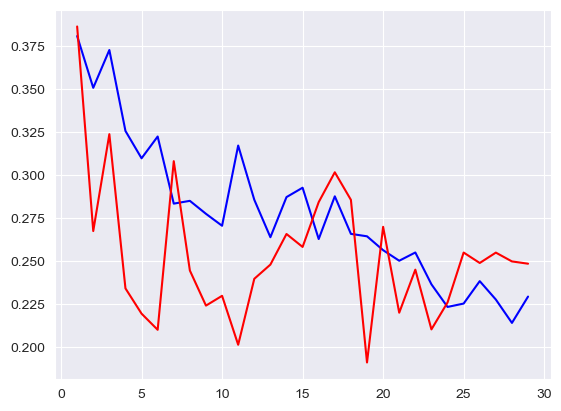

In [32]:
import matplotlib.pyplot as plt

mse = history.history['loss']
val_mse = history.history['val_loss']

epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, 'b', label='Training loss')
plt.plot(epochs, val_mse, 'r', label='Validation loss')
plt.show()